<a href="https://colab.research.google.com/github/GUSTAVObbarbosa/projetos_iniciais/blob/main/Airbnb_Seattle_Analisando_os_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Seattle*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Seattle, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


Os dados utilizados na análise foram extraídos do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html) no dia 12 fevereiro de 2022.

Nesta análise exploratória foi utilizado o seguinte arquivo:
* `listing.csv`: <i> Summary information and metrics for listings in Seattle (good for visualisations)</i>. Dados compilados em 20 de dezembro de 2021.

É importante ressaltar que esses tipos de fontes de dados estão em constante atualização e, portanto, futuramente pode ser que a estrutura do dados tenha sido modificada o que irá quebrar o código fornecido nesse notebook.

Os pacotes utilizados inicialmente foram <i>Pandas</i>, <i>Matplotlib</i> e <i>Seaborn</i>. 

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('/content/drive/MyDrive/listings.csv', index_col='id')

## Análise dos Dados


O dataset a ser analisado é composto por 18 colunas / variáveis, com as seguintes definições:

**Dicionário das variáveis**

* `id`: identificação única do imóvel
* `name`: nome no anúncio do imóvel
* `host_id`: identificação única do anfitrião
* `host_name`: nome do anfitrião
* `neighbourhood_group`: agrupamento dos bairros
* `neighbourhood`: bairro
* `latitude`: coordenadas de latitude
* `longitude`: coordenadas de longitude
* `room_type`: tipo de acomodação
* `price`: preço do aluguel
* `minimum_nights`: mínimo de noites para reserva
* `number_of_reviews`: quantidade de avaliações da estadia
* `last_review`: última avaliação da estadia
* `reviews_per_month`: número de avaliações por mês
* `calculated_host_listings_count`: quantidade de imóveis do mesmo anfitrião
* `availability_365`: disponibilidade do imóvel nos últimos 365 dias
* `number_of_reviews_ltm`: quantidade de avaliações do imóvel
* `license`: licença do Airbnb.

In [ ]:
df.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

O DataFrame possui 18 colunas (incluíndo o índice `id`) e 4.686 entradas de imóveis.

In [ ]:
# identificar o volume de dados do DataFrame
print("Variáveis:  {}".format(df.shape[1]))
print("Entradas:   {}".format(df.shape[0]))
print("")
print("O formato das variáveis são:")
display(df.dtypes)

Variáveis:  17
Entradas:   4686

O formato das variáveis são:


name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Para entender melhor o nosso dataset, vamos análisar as 5 primeiras entradas:

In [ ]:
df.head(5)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
2318,Casa Madrona - Urban Oasis 1 block from the park!,2536,Megan,Central Area,Madrona,47.61094,-122.29286,Entire home/apt,333,7,36,2021-11-30,0.22,1,332,4,STR-OPLI-19-002837
6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,99,3,157,2021-09-14,1.04,2,0,8,str-opli-19-002622
9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,62,2,154,2021-10-16,1.11,8,365,6,STR-OPLI-19-003039
9531,The Adorable Sweet Orange Craftsman,31481,Cassie,West Seattle,Fairmount Park,47.55495,-122.38663,Entire home/apt,185,2,54,2021-12-07,0.45,2,269,13,STR-OPLI-19-002182
9534,The Coolest Tangerine Dream MIL!,31481,Cassie,West Seattle,Fairmount Park,47.55627,-122.38607,Entire home/apt,145,5,59,2021-10-15,0.49,2,202,5,STR-OPLI-19-002182


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Apenas três variáveis possuem valores ausentes:
* `license`: 23,6%
* `reviews_per_month`: 15,4%
* `last_review`: 15,4%

O restante das variáveis possuem todas as entradas.


In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().mean())*100).sort_values(ascending=False)

license                           23.644900
reviews_per_month                 15.407597
last_review                       15.407597
minimum_nights                     0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
name                               0.000000
host_id                            0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_name                          0.000000
price                              0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Agora iremos plotas as variáveis númericas para conhecer a distribuição de cada variável e começar a identificar possiveis <i>outliers</i>.

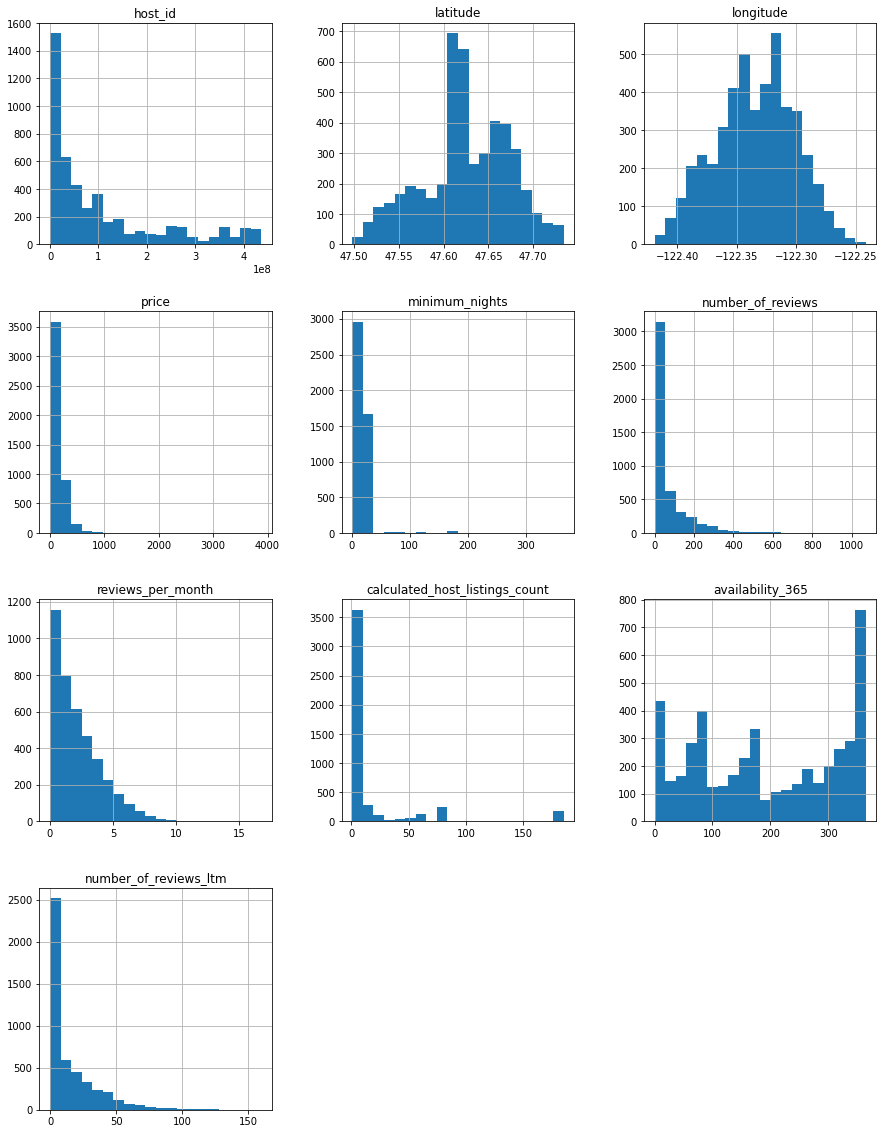

In [ ]:
#Histograma
df.hist(bins=20, figsize=(15,20));

### **Q4. Qual a média dos preços de aluguel?**

Analisando estatisticamente as 4.686 entradas com dados de preços das diárias, temos:

*   Média = USD 158,66
*   Valor mínimo = USD 0,00
*   Valor máximo = USD 3.887,00
*   Desvio padrão = USD 146,00




In [ ]:
#Dados estatísticos completos
df.price.describe()

count    4686.000000
mean      158.667947
std       146.632730
min         0.000000
25%        86.000000
50%       125.000000
75%       188.750000
max      3887.000000
Name: price, dtype: float64

Nessa caso, podemos concluir que o valor mínimo é um valor faltante.
Portanto, retirando os valores igual a zero, temos:

*   Média = USD 158,76
*   Valor mínimo = USD 13,00
*   Valor máximo = USD 3.887,00
*   Desvio padrão = USD 146,62


In [ ]:
#Dados estatísticos sempre o preço = zero
df_clean = df[ (df.price != 0)]
df_clean.price.describe()

count    4683.000000
mean      158.769592
std       146.624667
min        13.000000
25%        86.000000
50%       125.000000
75%       189.000000
max      3887.000000
Name: price, dtype: float64

Portanto, podemos concluir que o preço igual à zero pouco interefere os dados.
Porém, ao analisar o histograma (acima) notamos que possivelmente há um outlier. Então, para identificar esse outlier, iremos plotar um gráfico de caixa:

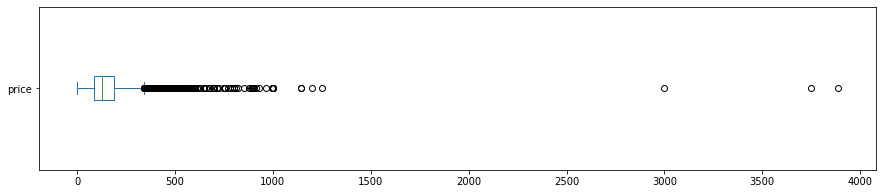

In [ ]:
#Analisando a distribuição dos dados de preço plorando o boxplot
df.price.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()

Ao analisar o gráfico de caixa, é visível que maior parte dos dados são menores que 1.500 e que apenas há 3 entradas maiores que esse valor. Por tanto, iremos considerar apenas os dados de <b>0</b> à <b>1.5000</b>.

In [ ]:
#Total de entradas considerando apenas os valores de preço maiores que 1.500

print("Total de entradas com preço maiores que 1.500 = {}.".format(df[df.price >= 1500].host_id.count()))

Total de entradas com preço maiores que 1.500 = 3.


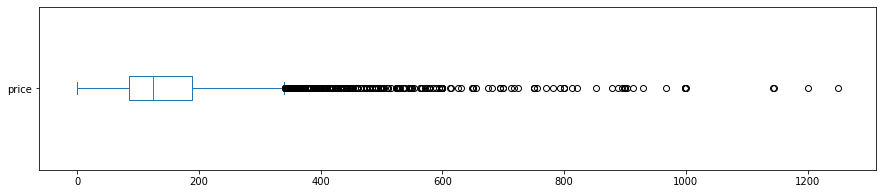

In [4]:
df_clean = df[df.price <= 1500]

df_clean.price.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()

### **Q4. Qual a correlação existente entre as variáveis**

Uma das formas de analisar se existe relação entre duas ou mais variáveis é através da matriz de correlação. Essa matriz calcula a intensidade da correlação entre as variáveis - o coeficiente de correlação.

As variáveis que utilizaremos serão: `price`, `minimum_nights`,
`number_of_reviews`, `reviews_per_month` e `availability_365`. 

Para melhor analisar esses dados, foi utilizado o dataframe "limpo", desconsiderando os outliers encontrados na variável `price` e os valores nulos da variável `reviews_per_month`:

Uma vez que identificamos os outliers da variável `price`, iremos utilizar o <i>DataFrame</i> limpo:

In [11]:
#Retirar os dados nulos de "reviews_per_month"
df_clean.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
price,1.000000,0.003167,-0.144256,-0.173817,0.075923
minimum_nights,0.003167,1.000000,-0.096633,-0.302185,0.073251
number_of_reviews,-0.144256,-0.096633,1.000000,0.513292,-0.042822
reviews_per_month,-0.173817,-0.302185,0.513292,1.000000,-0.071447
availability_365,0.075923,0.073251,-0.042822,-0.071447,1.000000


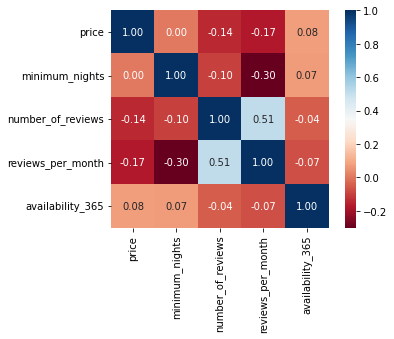

In [12]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].corr()
display(corr)

# mostrar a matriz de correlação
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

In [ ]:
# plotar um heatmap a partir das correlações


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A variável `room_type` indica os tipos de imóveis disponíveis para aluguel em Seattle. Ao analisar essa variável, notamos que há disponível apenas 3 tipos de imóveis:
*   Entire home/apt (imóvel inteiro);
*   Private room (quarto privado);
*   Shared room (quarto compartilhado).

Abaixo, temos a quantidade disponível de cada tipo de imóvel e sua representatividade (em percentual).




In [22]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    2793
Private room        514
Shared room          28
Name: room_type, dtype: int64

In [23]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df_clean.shape[0])*100

Entire home/apt    83.748126
Private room       15.412294
Shared room         0.839580
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



Um forma de entender melhor a distribuição dos valores do aluguel dos imóveis, é calcular o preço médio agrupado por bairro.
Abaixo, temos esses valores médios. Analisando os dados, é possível notar que a variação dos preços médios não é muito elevada.

In [31]:
# ver preços por bairros, na média
df.groupby(['neighbourhood_group']).mean().price.sort_values(ascending=False)

neighbourhood_group
Queen Anne             209.488235
Seward Park            188.393939
Central Area           183.094763
Magnolia               179.785714
Ballard                168.557312
Downtown               165.955521
West Seattle           163.558209
Other neighborhoods    154.789243
Cascade                151.290909
Rainier Valley         150.984733
Capitol Hill           150.289362
Lake City              149.950000
Beacon Hill            129.789216
University District    124.194444
Interbay               121.294118
Delridge               111.012121
Northgate              106.606838
Name: price, dtype: float64

Outra forma de avaliar se o preço médio de um determinado bairro não é um <i>outlier</i> é avaliar a quantidade de <i>inputs</i> que temos por cada bairro.

Abaixo, percebemos que o bairro mais caro, Queen Anne, possui 340 <i>inputs</i>, sendo a 4º variável com mais <i>inputs</i>. Ou seja, não é um <i>outlier</i>. 

In [36]:
df['neighbourhood_group'].value_counts()

Other neighborhoods    911
Downtown               652
Capitol Hill           470
Central Area           401
Queen Anne             340
West Seattle           335
Rainier Valley         262
Ballard                253
Beacon Hill            204
University District    180
Delridge               165
Cascade                165
Northgate              117
Magnolia                84
Lake City               80
Interbay                34
Seward Park             33
Name: neighbourhood_group, dtype: int64

A partir das informaçoes de latitude e longitude, podemos plotar os dados de preço em um mapa para avaliar se há diferença de preço por regiões.
Abaixo temos um mapa no estilo "scatter".

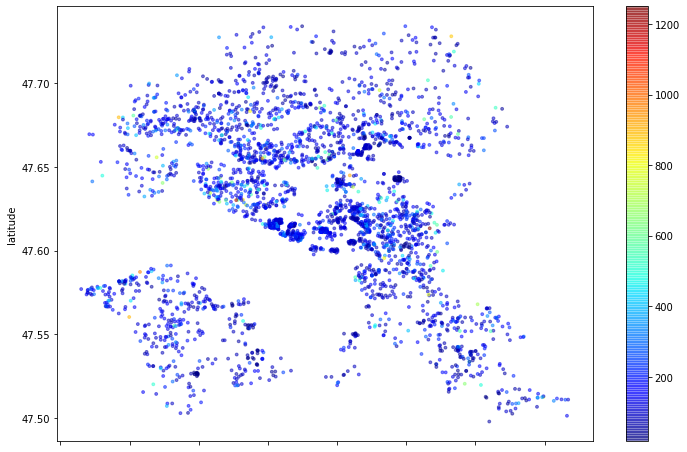

In [47]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.5, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

O valor médio do mínimo de noites (`minimum_nights`) é de 7 dias, o que indica que a maioria das acomodações não são acomodações de "final de semana".

In [50]:
# ver a média da coluna `minimum_nights`
df_clean.minimum_nights.mean()

7.2368815592203894

## Conclusões


Ao analisar os dados de forma mais superficial, foi possível notar que não há grande variação dos dados de cada variável e que há poucos <i>outliers</i>. Sendo assim, para análises mais profundas, deve-se considerar a utilização de outras variáveis.